
# 数据探索

In [3]:
# 导入工具包
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
# 加载数据
train_data_path = r'E:/DataSet/Tianchi/repeatPurchase/data_format1/train_format1.csv'
test_data_path = r'E:/DataSet/Tianchi/repeatPurchase/data_format1/test_format1.csv'
user_info_path = r'E:/DataSet/Tianchi/repeatPurchase/data_format1/user_info_format1.csv'
user_log_path = r'E:/DataSet/Tianchi/repeatPurchase/data_format1/user_log_format1.csv'

train_data = pd.read_csv(train_data_path, sep=',', encoding='utf-8')
test_data = pd.read_csv(test_data_path, sep=',', encoding='utf-8')
user_info = pd.read_csv(user_info_path, sep=',', encoding='utf-8')
user_log = pd.read_csv(user_log_path, sep=',', encoding='utf-8')

## 数据基本情况整理

In [13]:
# train_data.head(10)
# 用户ID， 店铺ID， label：1重复购买，0非重复购买

# user_info.head(10)
# 用户ID，年龄区间，性别(0:女， 1：男， 2andnull：未知）

# user_log.head(10)
# 用户ID，商品ID， 商品种类ID， 店铺ID， 品牌ID， 行为发生时间， 行为类型（0：点击，1：加入购物车，2：购买， 3： 收藏）

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0
5,328862,623866,1271,2882,2661.0,829,0
6,328862,542871,1467,2882,2661.0,829,0
7,328862,536347,1095,883,1647.0,829,0
8,328862,364513,1271,2882,2661.0,829,0
9,328862,575153,1271,2882,2661.0,829,0


In [14]:
user_info.info()
# 数据有缺失

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [15]:
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


In [17]:
# train_data.info()
# test_data.info()
#  训练集和测试的数据无缺失

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261477 entries, 0 to 261476
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      261477 non-null  int64  
 1   merchant_id  261477 non-null  int64  
 2   prob         0 non-null       float64
dtypes: float64(1), int64(2)
memory usage: 6.0 MB


In [28]:
# 数据缺失情况整理
# 用户年龄缺失情况
print((user_info.shape[0] - user_info['age_range'].count()) / user_info.shape[0])
# 0.005226677982884221 千分之五的缺失率，需要考虑数据填充
print(user_info[user_info['age_range'].isna() | (user_info['age_range'] == 0)].count())
# 年龄区间特征的分组情况
print(user_info.groupby(['age_range'])[['user_id']].count())

0.005226677982884221
user_id      95131
age_range    92914
gender       90664
dtype: int64
           user_id
age_range         
0.0          92914
1.0             24
2.0          52871
3.0         111654
4.0          79991
5.0          40777
6.0          35464
7.0           6992
8.0           1266


In [31]:
# 性别缺失情况
print((user_info.shape[0] - user_info['gender'].count()) / user_info.shape[0])
# 性别缺失情况达到千分之十五
print(user_info[user_info['gender'].isna() | (user_info['gender'] == 2)].count())
print(user_info.groupby(['gender'])[['user_id']].count())

0.01517316170403376
user_id      16862
age_range    14664
gender       10426
dtype: int64
        user_id
gender         
0.0      285638
1.0      121670
2.0       10426


In [32]:
# 用户日志的缺失情况
user_log.isna().sum()
# brand_id       91015 商品品牌缺失严重，还没办法处理

user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

In [39]:
# 数据正负样本分布情况
# 正负样本比例
print("正样本比例：", train_data[train_data['label'] == 1].count()[0] / train_data.shape[0])
print("负样本比例：", train_data[train_data['label'] == 0].count()[0] / train_data.shape[0])
# 正负比例很大，导致数据倾斜，需要对正样本过采样或者负样本欠采样,或者给正样本更大的权重

正样本比例： 0.06115063788027478
负样本比例： 0.9388493621197253


正负样本数量：
 label
0    244912
1     15952
Name: user_id, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

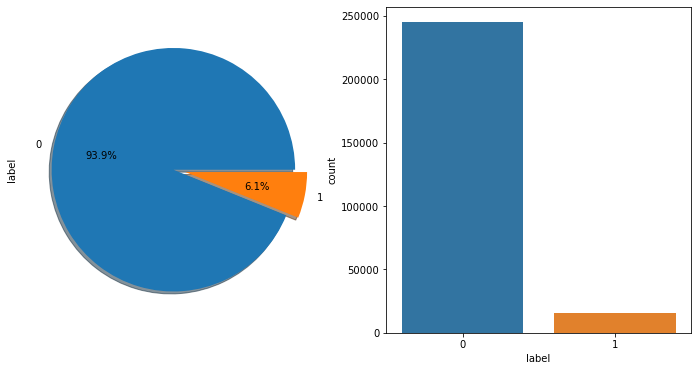

In [45]:
label_gp = train_data.groupby(['label'])['user_id'].count()
print('正负样本数量：\n', label_gp)
_, axe = plt.subplots(1, 2, figsize=(12, 6))
train_data.label.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode = [0, 0.1], ax=axe[0])
sns.countplot('label', data=train_data, ax=axe[1],)

选取top5店铺
店铺	购买次数
4044    3379
3828    3254
4173    2542
1102    2483
4976    1925
Name: merchant_id, dtype: int64


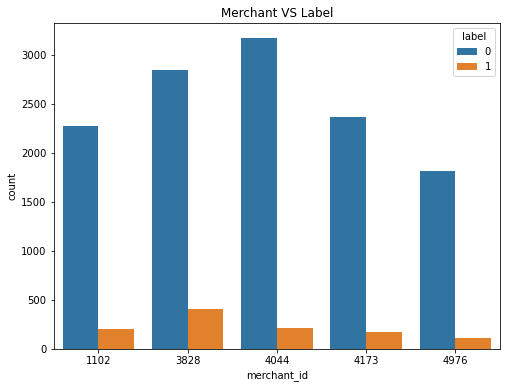

In [48]:
print('选取top5店铺\n店铺\t购买次数')
print(train_data.merchant_id.value_counts().head(5))
train_data_merchant = train_data.copy()
train_data_merchant['TOP5'] = train_data_merchant['merchant_id'].map(
    lambda x: 1 if x in [4044, 3828, 4173, 1102, 4976] else 0)
train_data_merchant = train_data_merchant[train_data_merchant['TOP5'] == 1]
plt.figure(figsize=(8, 6))
plt.title('Merchant VS Label')
sax = sns.countplot('merchant_id', hue='label', data=train_data_merchant)
# 不同店铺的复购率不同

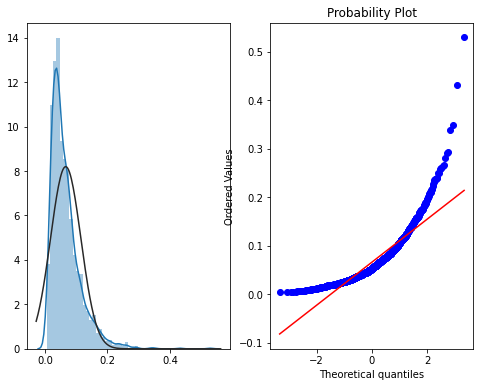

In [51]:
# 店铺的复购分布情况
repeat_merchant_buy = [rate for rate in train_data.groupby(['merchant_id'])['label'].mean() if rate < 1 and rate >0]
plt.figure(figsize=(8,6))
ax = plt.subplot(1, 2, 1)
sns.distplot(repeat_merchant_buy, fit=stats.norm)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(repeat_merchant_buy, plot=plt)
# 店铺的复购情况大部分都是在0 ~ 0.3之间

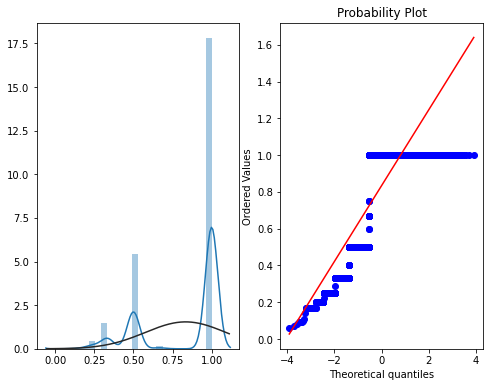

In [56]:
# 用户的复购分布情况
user_repeat_bug = [rate for rate in train_data.groupby(['user_id'])['label'].mean() if rate <= 1 and rate > 0]
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 2, 1)
sns.distplot(user_repeat_bug, fit=stats.norm)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(user_repeat_bug, plot=plt)
# 近6个月用户的复购概率很小，基本以买一次为主 

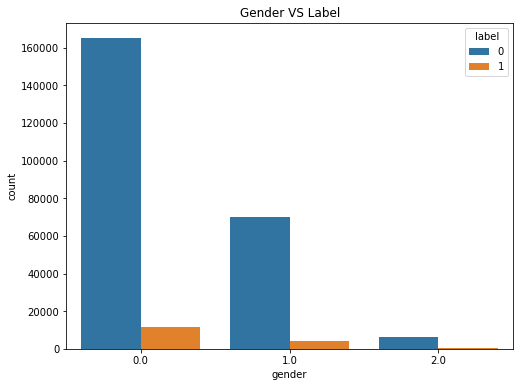

In [59]:
# 用户特征对复购的影响
train_data_user_info = train_data.merge(user_info, on='user_id', how='left')
# print(train_data_user_info.info())
# print(train_data_user_info.describe())
# print(train_data_user_info.columns)

# 用户性别对复购的影响
plt.figure(figsize=(8, 6))
plt.title('Gender VS Label')
ax = sns.countplot('gender', hue='label', data=train_data_user_info)
for p in ax.patches:
    height = p.get_height()
    
# 性别不同，复购率不同

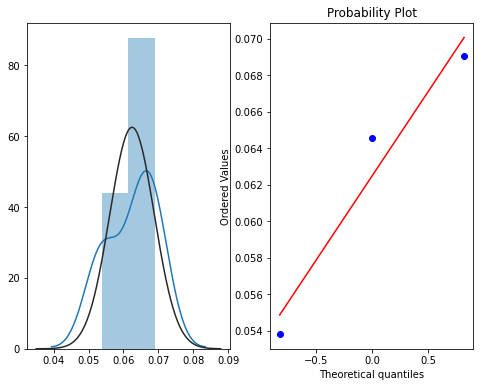

In [60]:
# 用户性别复购分布
repeat_buy  = [rate for rate in train_data_user_info.groupby(['gender'])['label'].mean()]

plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 2, 1)
sns.distplot(repeat_buy, fit=stats.norm)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(repeat_buy, plot=plt)
# 男女的复购概率不同

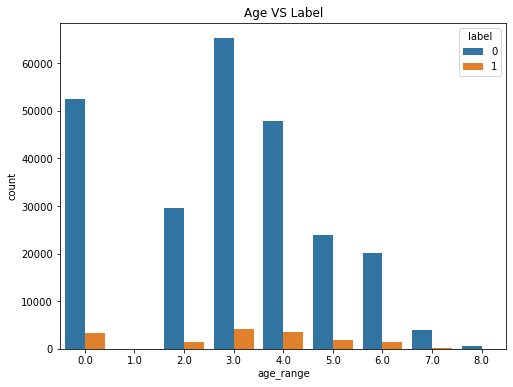

In [61]:
# 用户年龄段复购分布
plt.figure(figsize=(8, 6))
plt.title('Age VS Label')
ax = sns.countplot('age_range', hue='label', data=train_data_user_info)

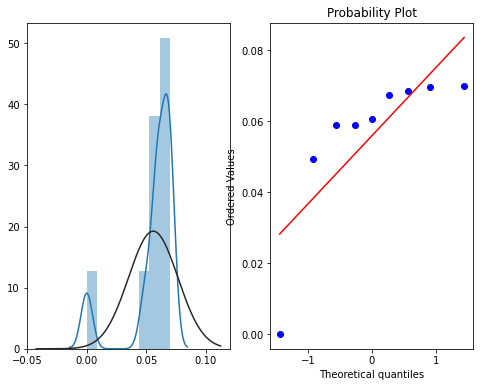

In [64]:
# 用户年龄段复购概率
repeat_buy = [rate for rate in train_data_user_info.groupby(['age_range'])['label'].mean()]
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 2, 1)
sns.distplot(repeat_buy, fit=stats.norm)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(repeat_buy, plot=plt)
# 不同年龄段的复购概率不同